In [2]:
import symlib

sim_dir = symlib.get_host_directory(
".", "SymphonyLCluster", "Halo_042")

# Read header data needed to fast particle reads
part = symlib.Particles(sim_dir)

# Read particle data for snapshot 199
p = part.read(199)

In [3]:
# Important properties

# Particle positions relative to the host in physical kpc
x = p[1]["x"]
# Particle velocities relative to the host in km/s
v = p[1]["v"]
# Boolean indicating whether this particle is currently
# being tracked (always true with default settings)
ok = p[1]["ok"]

# Niche properties that most users won't need.

# Snapshot when this particle was first accreted onto any
# halo.
snap = p[1]["snap"]
# True if the particle was smoothly accreted onto this subhalo
# and false if it accreted onto a smaller object first.
smooth = p[1]["smooth"]
# The original IDs of the particles in the raw Gadget-2 snapshots
id = p[1]["id"]

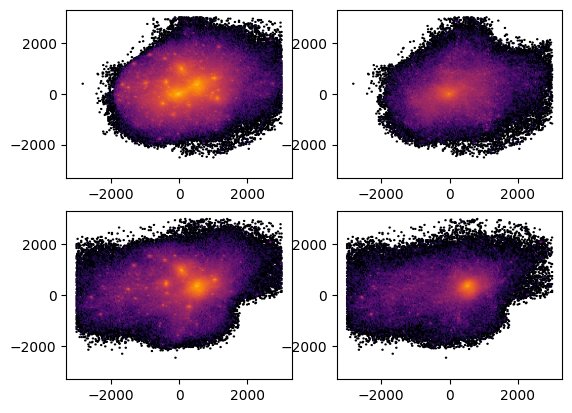

In [5]:
import matplotlib.pyplot as plt
import symlib
import matplotlib as mpl

sim_dir = symlib.get_host_directory(
    ".", "SymphonyLCluster", "Halo_042")

fig, ax = plt.subplots(2, 2)

part = symlib.Particles(sim_dir)
p = part.read(199)

# Plot parameters
norm = mpl.colors.LogNorm(vmin=1, vmax=10000)
lim = 3000
kwargs = {"extent": [-lim, lim, -lim, lim],
          "norm": norm, "cmap": "inferno", "gridsize": 200}

# Plot the host's particles
ax[0,0].hexbin(p[0]["x"][:,0], p[0]["x"][:,1], **kwargs)

# Plot the biggest subhalo's particles
ax[1,0].hexbin(p[1]["x"][:,0], p[1]["x"][:,1], **kwargs)

# Plot smoothly accreted particles of the host
is_smooth = p[0]["smooth"]
ax[0,1].hexbin(p[0]["x"][is_smooth,0],
               p[0]["x"][is_smooth,1], **kwargs)

# Plot smoothly accreted particles of the biggest subhalo.
is_smooth = p[1]["smooth"]
ax[1,1].hexbin(p[1]["x"][is_smooth,0],
               p[1]["x"][is_smooth,1], **kwargs)

伪相空间密度 (Pseudo Phase-Space Density, PPSD) 研究综述

概念起源与研究动机

Taylor & Navarro (2001) 首次在冷暗物质数值模拟中提出了伪相空间密度的概念，定义 $Q(r)\equiv\rho(r)/\sigma^3(r)$ （其中 $\rho$ 是质量密度，$\sigma$ 是速度色散） ￼ ￼。他们发现，尽管 $\rho(r)$ 和 $\sigma(r)$ 各自偏离幂律，但它们的组合 $Q(r)$ 却近似呈简单幂律（指数约 $-1.9$）跨越数十倍标度范围 ￼ ￼。这一发现受到人们的关注，因为它为暗晕内部结构的普适性提供了新的线索：不同质量和形成历史的暗晕似乎都满足类似的粗粒化相空间密度分布，这提示可能存在统一的动力学机制或守恒量。由于直接研究 6 维相空间密度困难，PPSD 提供了一种易于计算的指标，用于定量暗晕的内在规律性，并帮助联系暗晕密度分布与速度各向异性等动力学性质 ￼。

早期理论模型与幂律预测

在 PPSD 被发现之前，人们已有自相似球对称塌缩模型（如 Fillmore & Goldreich 1984；Bertschinger 1985）研究暗物质晕结构。Bertschinger (1985) 的二次吸积自相似解预测，在内侧的密度涨落被完全吸积后，伪相空间密度满足 $Q(r)\propto r^{-15/8}$ ￼ ￼。事实上，Taylor & Navarro 注意到这个指数 $15/8=1.875$，恰好是 Bertschinger 模型的预测值 ￼。此外，通过求解球对称的 Jeans 方程并假设速度各向异性与密度斜率线性相关，Dehnen & McLaughlin (2005) 等人也导出了类似的幂律关系。Dehnen & McLaughlin 发现，在取径向速度色散时，$Q_r(r)=\rho/\sigma_r^3\propto r^{-1.94}$ ￼，与模拟结果接近。需要指出的是，这些早期理论模型都作了理想化假设（如完全球对称、单调吸积、各向异性关系等），忽略了合并、扭曲和扰动等复杂效应，因此在精度和普适性上存在局限。这些模型虽然能解释部分模拟结果（如给出相似的幂律指数），但无法完整预测真实宇宙中暗晕的全部性质。

数值模拟中的研究进展
	•	幂律形式： 大量冷暗物质 N-体模拟一致确认，暗晕的伪相空间密度几乎在内部遵循 $Q(r)\propto r^{-\chi}$ 的幂律形式 ￼。例如，Ludlow 等人 (2011) 明确给出模拟结果可用单一幂律拟合，Taylor & Navarro (2001) 首次发现该规律后，后续多项研究反复验证了这一点 ￼ ￼。无论是整体速度色散还是径向速度色散，对应的 $Q$ 和 $Q_r$ 都呈相似幂律衰减。
	•	指数数值： 模拟中拟合得到的幂律指数 $\chi$ 通常在 $1.8\text{–}2.0$ 附近。Dehnen & McLaughlin (2005) 在理论推导中得到 $\chi\approx1.94$ ￼，模拟测量值也多集中于 $\sim1.9$。不同团队的测量结果略有差异，但普遍认为 $\chi\approx1.9$ 具有“拟普适性”，体现了引力聚集下的尺度不变性。
	•	普适性与稳定性： 模拟发现，不同质量和形成历史的暗晕中，PPSD 的幂律指数差别不大。已有研究指出，不同晕的 $\chi$ 值相互接近，变化幅度仅约 $10%!–15%$ ￼；随时间演化或红移变化也很小（约 $\pm10%$ 量级）。这表明在从星系团到星系质量的尺度范围内，PPSD 的形状相对稳定，暗晕的内部结构具有一定的自相似性。
	•	幂律失效： 尽管 PPSD 在晕中心区域表现良好，但在更大半径会出现偏离。Ludlow 等 (2010) 等研究发现，在接近晕的准静止边界（如 $r_{200}$ 处）附近，$Q(r)$ 会明显上离幂律衰减 ￼ ￼。这一偏离与模拟中入侵物质的非平衡特征相符，即在这一半径处尚未充分涨落的物质导致 PPSD 偏离中心区的趋势。这也说明 PPSD 幂律仅适用于暗晕的平稳内区。

研究过程中的主要问题
	•	幂律起源： 目前尚无确切共识解释为何 PPSD 呈幂律。有学者认为这可能是自引力无碰撞体系演化的固有性质，也有人怀疑这只是数值模拟的巧合。Arora & Williams (2020) 通过分析 Jeans 方程和模拟经验关系，认为 $Q\propto r^{-\chi}$ 可能并非基本规律，而是一种偶然现象 ￼；他们指出现有条件能够“将 $Q\propto r^{-\chi}$”同时兼容在方程中，但其分布特征与真正演化无关，暗示幂律可能并无深层物理含义。
	•	模拟分辨率： 当前 N-体模拟的分辨率已能验证 PPSD 的幂律趋势，但要区分细微差异仍受限。理论上，因为 Einasto 型密度分布的中心并非幂律，暗示高精度下 PPSD 应出现偏离 ￼ ￼。Ludlow 等指出，在现有最高分辨率（如 Aq-A-1 暗晕）下，$Q(r)$ 的拟合与 Einasto 拟合同样好，需要更高分辨率才能显现差异 ￼。因此，有限的粒子数和空间分辨率可能会掩盖 $Q(r)$ 在最内区或细节上的微小偏差。
	•	子结构与非平衡： 数值模拟中的子晕和扰动会影响 PPSD 的测定。Ludlow 等 (2010) 通过剔除次级子晕后考察主晕平滑部分的 $Q(r)$，发现剔除后光滑晕的 $Q_s(r)$ 在中心依然近似幂律，而包含子结构时会出现局部扰动 ￼。同时，对于非平衡物质（如仍在落入的壳层），$Q(r)$ 会在临近晕边界时明显偏离内区的幂律趋势 ￼。这说明实际晕中存在的扰动和未平衡成分会导致 PPSD 形状偏移，必须仔细区分平滑主晕和次级结构才能正确提取幂律行为。

未解问题与未来方向
	•	非冷暗物质模型推广： 最近有研究将 PPSD 概念推广到热暗物质或玻色-爱因斯坦凝聚（Axion）等非冷暗物质模型。初步模拟表明，在暖暗物质（WDM）模型中，晕的 PPSD 在核心外依然近似幂律（指数约 $-1.9$），但由于 WDM 的相空间密度上限，中心形成平坦密度核，$Q(r)$ 在核内趋近常数 ￼。也有人研究了类费米子暗物质（如恒星中微子）相空间密度限制对晕结构的影响，发现伪相空间密度在核心处会偏离幂律。未来研究需要系统考察不同暗物质性质（如WDM、SFDM、热暗物质等）下 PPSD 的普适性与差异。
	•	与熵或热力学量的关联： PPSD 的幂律形式提示其可能与统计力学或熵概念相关。Kang & He (2011) 等通过构建等效压力和熵原理，推导出暗晕的稳态方程和 PPSD 分布，并与模拟结果在外区很好吻合 ￼。这些工作表明，可以尝试用统计力学法则来解释暗晕结构，并让 PPSD 成为类熵或状态变量。尚不清楚 $Q(r)$ 是否与引力系统的熵极大化、最大相空间密度守恒（如 Tremaine–Gunn 上限）等热力学原理有直接关系，这是一个开放问题。
	•	半解析模型与机器学习： 在半解析模型（如次级吸积模型）中，PPSD 有时被用作结构约束，例如在插值密度剖面时确保与 Jeans 方程相容。目前尚无广泛将 PPSD 引入半解析形成模型中的研究。另一方面，机器学习方法开始被用于预测暗晕结构（如使用神经网络学习密度-速度关系），在此过程中，PPSD 可以作为训练的约束或误差度量。未来工作可探索将模拟得到的 $Q(r)$ 模型集成到机器学习框架中，以提升半解析或经验方法对暗晕结构的预测能力。

参考文献： 本文内容基于大量文献成果，关键引文包括 Taylor & Navarro (2001) ￼, Dehnen & McLaughlin (2005) ￼, Ludlow 等 (2010, 2011) ￼ ￼, Arora & Williams (2020) ￼, Kang & He (2011) ￼, 以及近期关于 WDM 暗物质的综述 ￼等。上述工作奠定了 PPSD 研究的基础，并揭示了仍待解决的关键问题。